<a href="https://colab.research.google.com/github/luis8choa/Computer_Vision/blob/main/dogs_%26_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

#Descarga de set de datos usando tfds
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

In [ ]:
 #inspeccionemos los metadatos
 metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, 

# VISUALIZACIÓN DE DATOS

image  label
0  [[[251, 255, 255], [248, 254, 252], [242, 246,...      1
1  [[[221, 171, 118], [191, 140, 87], [236, 178, ...      1
2  [[[174, 180, 152], [182, 188, 160], [189, 195,...      1
3  [[[91, 65, 6], [93, 67, 8], [92, 66, 7], [92, ...      0
4  [[[139, 137, 138], [140, 138, 139], [141, 139,...      1
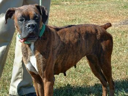
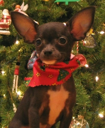
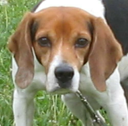
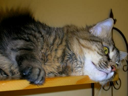
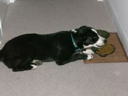

In [ ]:
#Tomamos 5 datos de la particion de entrenamiento y imprimimos su informacion con respecto a la metadata y los imprimimos como dataframe
tfds.as_dataframe(datos['train'].take(5), metadatos)
#El metodo convierte el dataset en un dataframe de pandas.

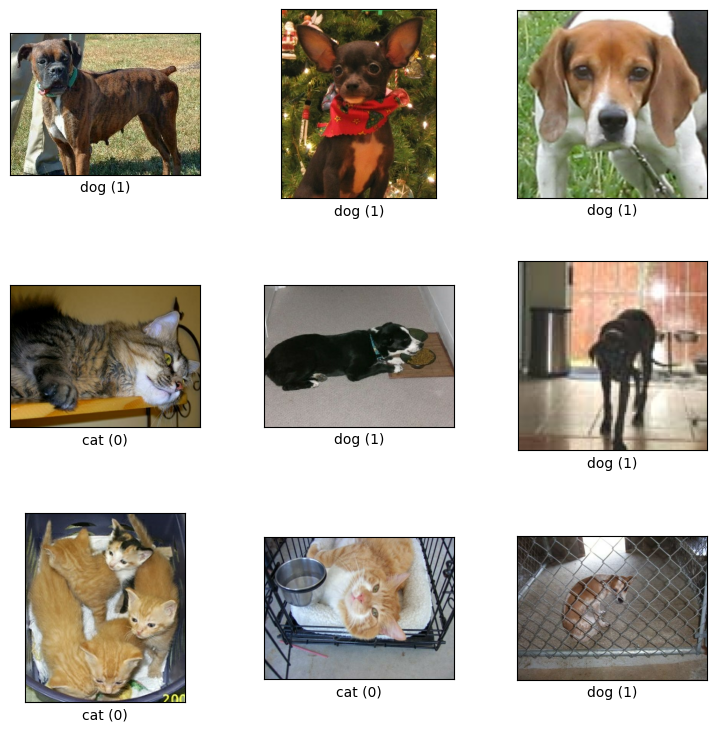

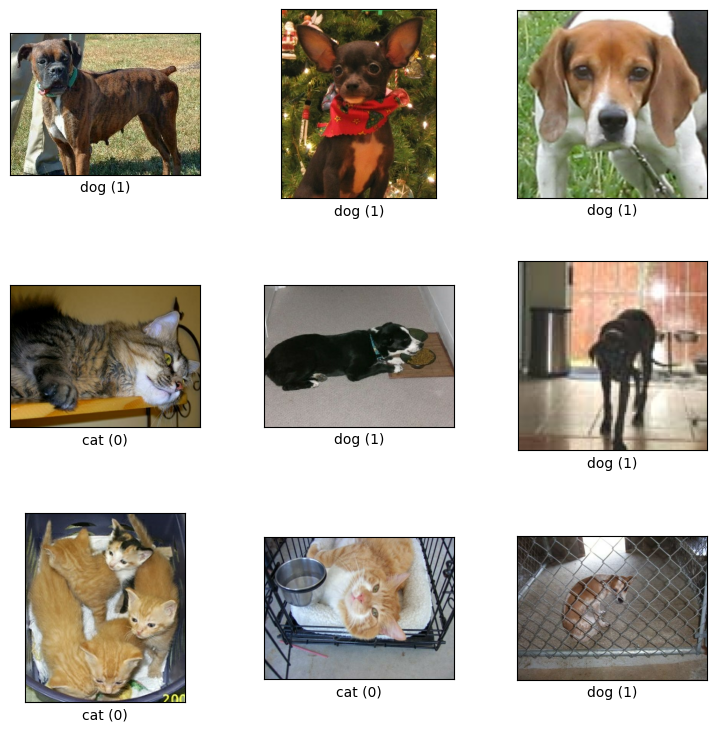

In [ ]:
tfds.show_examples(datos["train"], metadatos)
#Tambien podemos usar el metodo show_examples

#TRANSFORMACIÓN DE DATOS

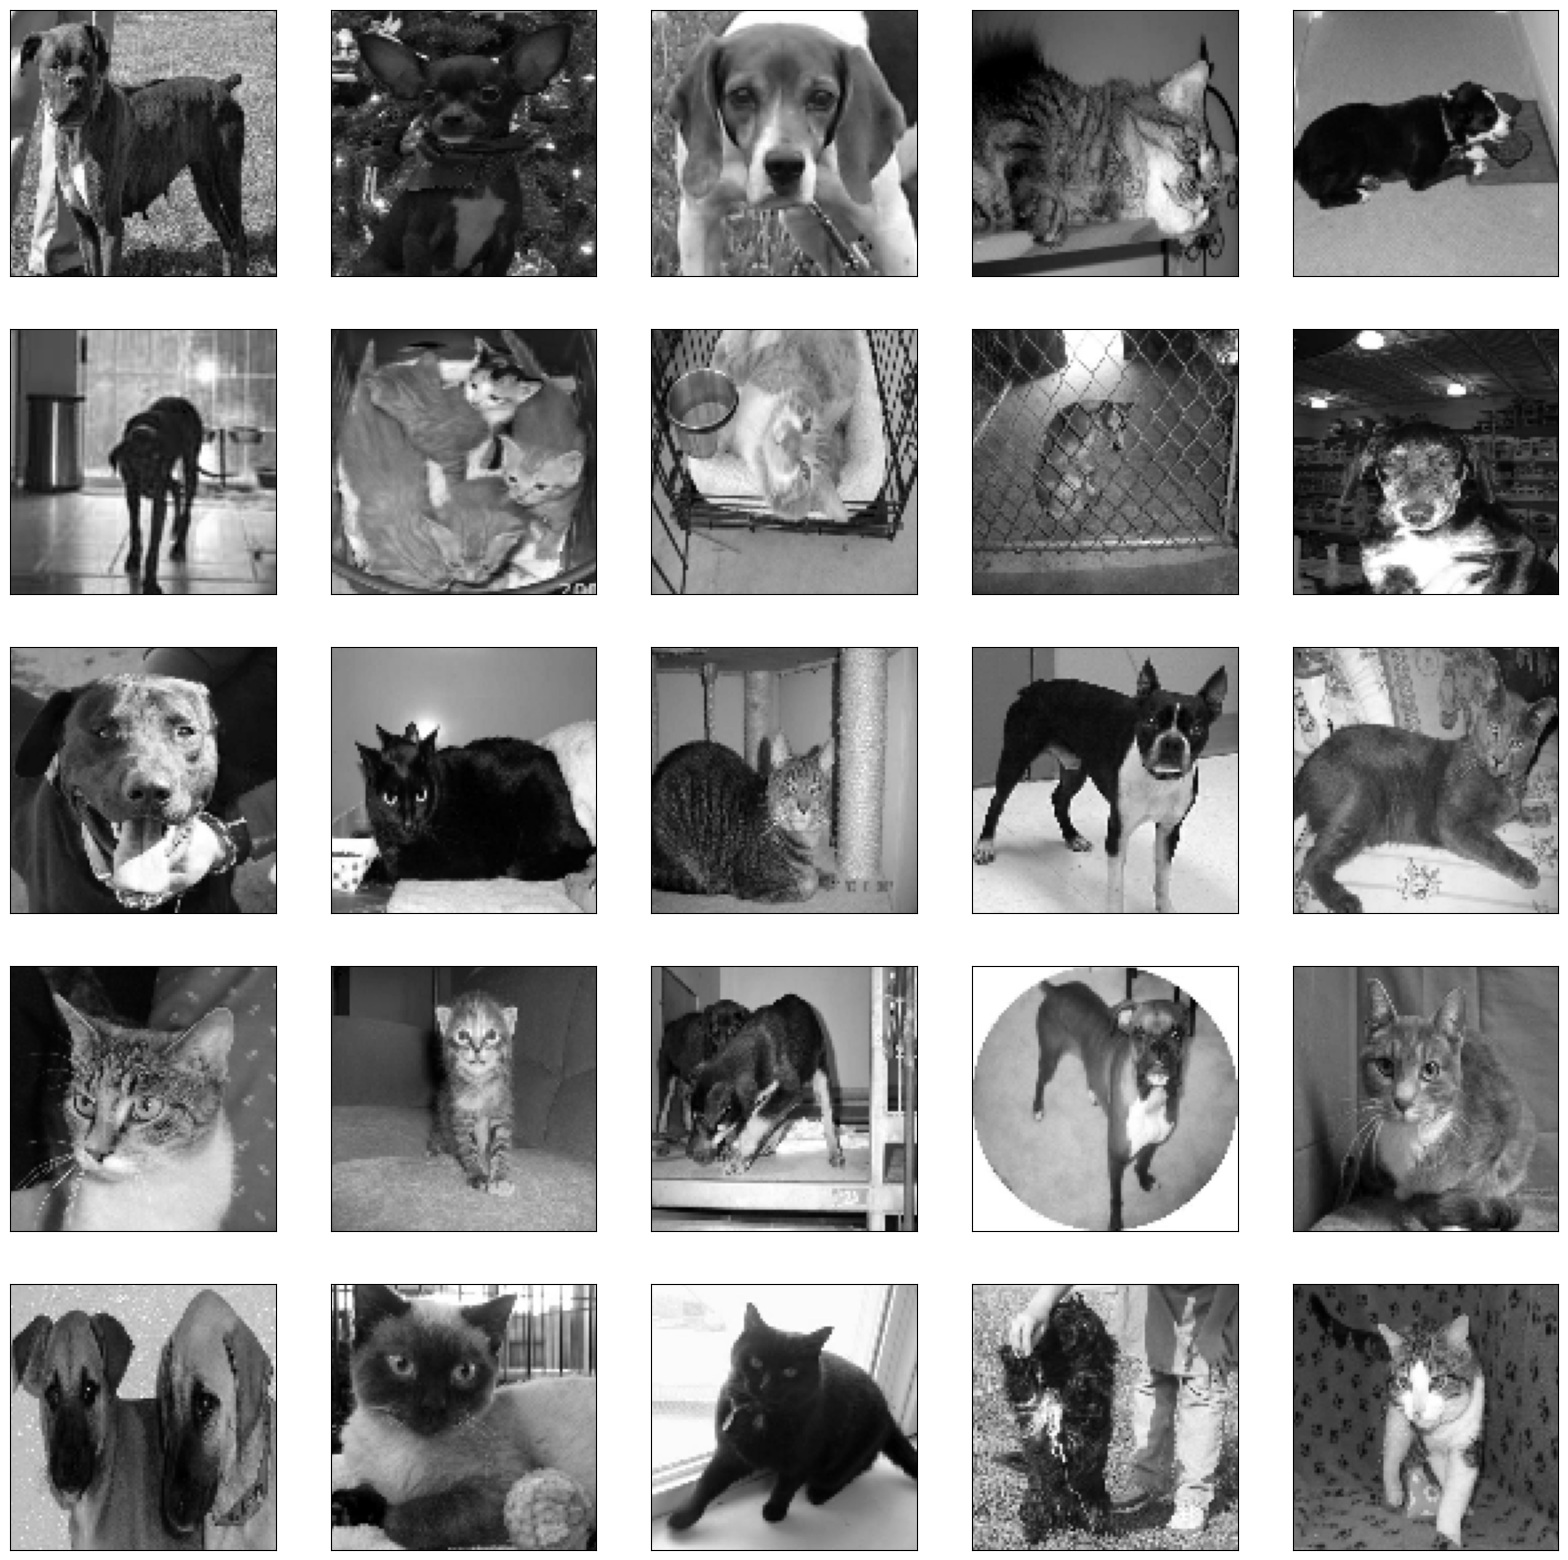

In [ ]:
import matplotlib.pyplot as plt

import cv2
#Necesitamos setear un mismo tamaño para todas las imagenes


plt.figure(figsize=(20,20))

tam_img = 100
#Con este tamaño es apreciable para nosoros como humanos de que tipo de animal se trata
#PROBABLEMENTE la red tambien pueda obtener la informacion necesaria para la clasificacion


#Indiquemos el tamaño de las imagenes

for i, (imagen, etiqueta) in enumerate(datos["train"].take(25)):
  imagen = cv2.resize(imagen.numpy(), (tam_img,tam_img))
  #Cambiemos tamaño de la imagen, algunas imagenes se veran estiradas pero es normal.


  #Entre mas grande sea la imagen mayor procesamiento se necesitara por parte de la red,
  #puesto que es mas info, podemos probar a reducir las imagenes siempre y cuando no perdamos
  #informacion relevante al momento de la reduccion

  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
  #Cambiamos el color. El formato original de lectura es BGR por lo cual indicamos la transformacion
  #desde ese formato a escala de grises.
  #Trabajar con imagenes de 3 canales (a color) es mas tardado, en caso de no ser necesario se pueden trabajar con
  #las imagenes transformadas a blanco y negro, como el siguiente caso.



  plt.subplot(5,5,i+1) #(n,m,i+1)
  #subplot de n filas y m fila. la posicion viene dada por el numero de iteracion

  plt.xticks([])
  plt.yticks([])
  #Asignemos los ticcks de los ejes a arreglos vacios para no tener que ver los numeros de pixeles3

  plt.imshow(imagen, cmap="gray")
  #Al tener imagenes en blanco y negro debemos indicar eso al momento de mostrar,
  #por defecto cv2 asume que son a color

#Iteramos sobre un enumeracion de las imagenes para obtener la imagen e imprimirla



In [ ]:
datos_entrenamiento = []

In [ ]:
for i, (imagen,etiqueta) in enumerate(datos["train"]): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (tam_img,tam_img))
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
  #Transformaciones para cada imagen

  imagen = imagen.reshape(tam_img, tam_img,1)
  #Estipularemos que solo trabajaremos con un canal de color (gris)
  #modificaremos entonces la forma del arreglo de pixeles (imagen)

  datos_entrenamiento.append([imagen,etiqueta])
  #Agregamos imagen modificada a nuestro arreglo de entrenamiento como array de tupla (viene con etiqueta)

In [ ]:
datos_entrenamiento[0] #Todos los valores de los pixeles
#La tupla nos entrega  el siguiente valor en la posicion 1: <tf.Tensor: shape=(), dtype=int64, numpy=1>
#El valor numpy indica 1 indica que es un perro. 1 -> perros, 0 -> gato

[array([[[249],
         [190],
         [105],
         ...,
         [189],
         [196],
         [143]],
 
        [[232],
         [127],
         [ 88],
         ...,
         [187],
         [180],
         [186]],
 
        [[171],
         [ 87],
         [ 83],
         ...,
         [129],
         [158],
         [166]],
 
        ...,
 
        [[113],
         [173],
         [162],
         ...,
         [143],
         [156],
         [119]],
 
        [[140],
         [152],
         [171],
         ...,
         [ 98],
         [155],
         [154]],
 
        [[ 91],
         [109],
         [167],
         ...,
         [ 46],
         [ 51],
         [ 47]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [ ]:
len(datos_entrenamiento)

23262

In [ ]:
X = [] #Imagenes de entrada (pixeles)
y = [] #etiquetas (gato o perro)

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
#Debemos nornalizar los valores de 0 a 1 en vez de 0 a 255 (por defefecto)
import numpy as np

X = np.array(X).astype(float)/255
#Convertimos X en un numpy array de numeros flotantes mientras dividimos entre el valor maximo de nuestros pixeles

In [ ]:
y
#Contiene tensores. Se requiere convertirlo en un arreglo simple de Integers de 0 a 1

[<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64

In [ ]:
y = np.array(y)

In [ ]:
X.shape

(23262, 100, 100, 1)

In [ ]:
y.reshape(-1,1)
y.shape

(23262,)

# DEFICIÓN DE 3 MODELOS

In [ ]:
modelo_A = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(tam_img, tam_img, 1)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    #Sigmoid siempre regresa valores entre 0 y 1.
    #Solo una salida.
])

modelo_B = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(tam_img, tam_img, 1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32*2, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32*4, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modelo_C = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(tam_img, tam_img, 1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32*2, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32*4, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
modelo_A.compile(optimizer='adam',
                 loss='binary_crossentropy', #Aplica para resultados binarios, solo dos opciones de salida
                 metrics=['accuracy'])

modelo_B.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

modelo_C.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
tensorboard_A = TensorBoard(log_dir='logs/A')
#Creamos el tensorboard definiendo donde se guardaran los logs
modelo_A.fit(X, y, batch_size=32,
             validation_split=0.15, #Particion de validacion del total de datos sera 0,15
             epochs=100,
             callbacks=[tensorboard_A] #Luego de cada uno de las epocas, se guardaran los resultados de la iteracion en forma de logs
             )
#En ESTE caso no tenemos separado un set de entrenamiento y pruebas (Pesima practica)
#Solo es un set grande, por lo cual a la hora de entrenar el modelo debemos indicarle
#el tamaño de particion que queremos

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-55dd29b7b842>", line 3, in <cell line: 3>
    modelo_A.fit(X, y, batch_size=32,
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1745, in fit
    data_handler = data_adapter.get_data_handler(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 1688, in get_data_handler
    return DataHandler(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 1292, in __init__
    self._adapter = adapter_cls(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 253, in __init__
    x, y, sa

TypeError: object of type 'NoneType' has no len()

In [ ]:
#Comando especial para importar extension de tensorboard
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs
#Lanzamos tensorboard e indicamos la carpeta donde estan ubicados los logs

#Debemos guardar los logs de nuestros diferentes historiales de entrenamiento en una misma carpeta para
#poder compararlos luego

In [ ]:
tensorboard_B = TensorBoard(log_dir='logs/B')

modelo_B.fit(X, y, batch_size=32,
             validation_split=0.15,
             epochs=100,
             callbacks=[tensorboard_B]
             )

Epoch 1/100
618/618 [==============================] - 12s 14ms/step - loss: 0.6154 - accuracy: 0.6451 - val_loss: 0.5124 - val_accuracy: 0.7476
Epoch 2/100
618/618 [==============================] - 8s 13ms/step - loss: 0.4653 - accuracy: 0.7776 - val_loss: 0.4984 - val_accuracy: 0.7625
Epoch 3/100
618/618 [==============================] - 8s 13ms/step - loss: 0.4009 - accuracy: 0.8155 - val_loss: 0.3985 - val_accuracy: 0.8238
Epoch 4/100
618/618 [==============================] - 10s 16ms/step - loss: 0.3403 - accuracy: 0.8481 - val_loss: 0.4146 - val_accuracy: 0.8034
Epoch 5/100
618/618 [==============================] - 12s 19ms/step - loss: 0.2740 - accuracy: 0.8830 - val_loss: 0.3675 - val_accuracy: 0.8410
Epoch 6/100
618/618 [==============================] - 9s 14ms/step - loss: 0.2062 - accuracy: 0.9145 - val_loss: 0.4226 - val_accuracy: 0.8441
Epoch 7/100
618/618 [==============================] - 10s 16ms/step - loss: 0.1380 - accuracy: 0.9445 - val_loss: 0.4571 - val_accur

In [ ]:
tensorboard_C = TensorBoard(log_dir='logs/C')

modelo_C.fit(X, y, batch_size=32,
             validation_split=0.15,
             epochs=100,
             callbacks=[tensorboard_C]
             )

Epoch 1/100
618/618 [==============================] - 13s 17ms/step - loss: 0.6198 - accuracy: 0.6442 - val_loss: 0.5243 - val_accuracy: 0.7441
Epoch 2/100
618/618 [==============================] - 11s 18ms/step - loss: 0.4927 - accuracy: 0.7581 - val_loss: 0.4466 - val_accuracy: 0.7986
Epoch 3/100
618/618 [==============================] - 9s 15ms/step - loss: 0.4295 - accuracy: 0.7963 - val_loss: 0.4419 - val_accuracy: 0.7937
Epoch 4/100
618/618 [==============================] - 10s 17ms/step - loss: 0.3870 - accuracy: 0.8241 - val_loss: 0.4257 - val_accuracy: 0.8089
Epoch 5/100
618/618 [==============================] - 9s 15ms/step - loss: 0.3459 - accuracy: 0.8449 - val_loss: 0.3738 - val_accuracy: 0.8361
Epoch 6/100
618/618 [==============================] - 11s 18ms/step - loss: 0.3102 - accuracy: 0.8621 - val_loss: 0.3478 - val_accuracy: 0.8473
Epoch 7/100
618/618 [==============================] - 10s 16ms/step - loss: 0.2762 - accuracy: 0.8821 - val_loss: 0.3509 - val_accu

#AUMENTO DE DATOS

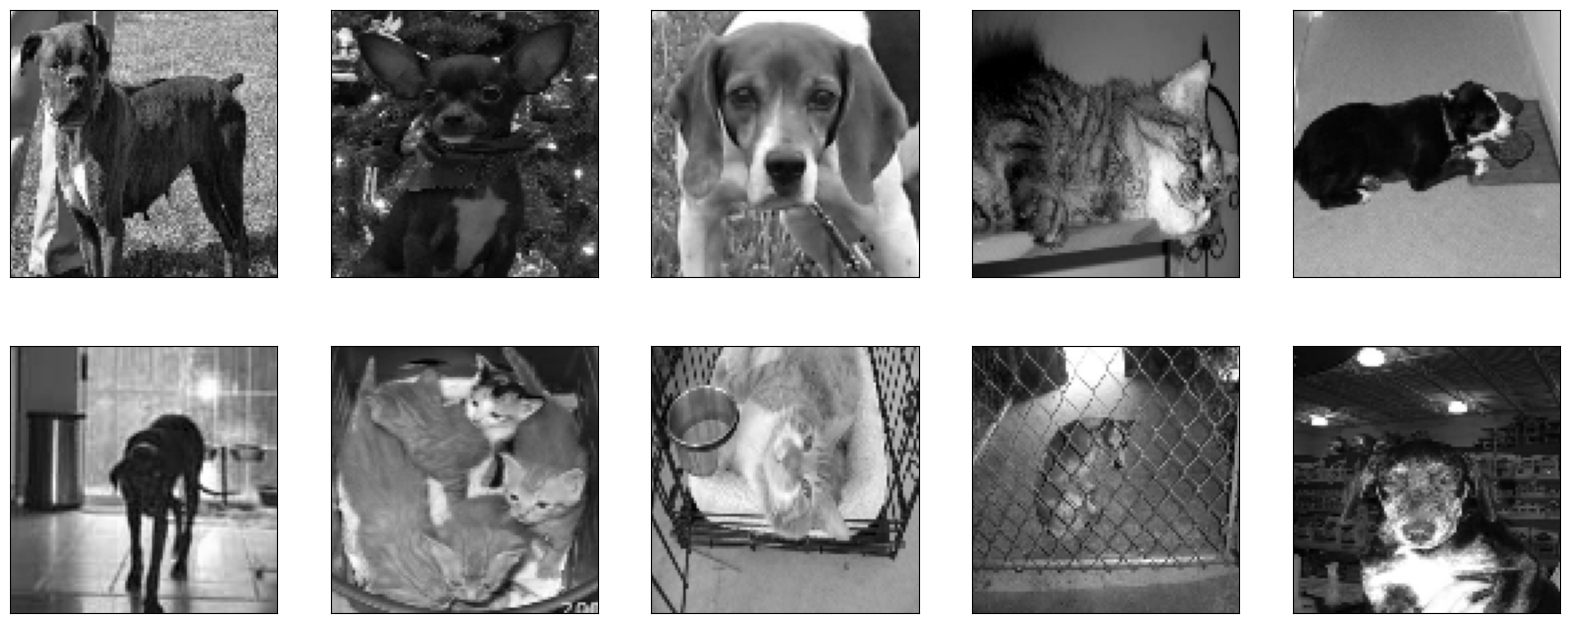

In [ ]:
plt.figure(figsize=(20,8))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X[i].reshape(tam_img,tam_img), cmap='gray')

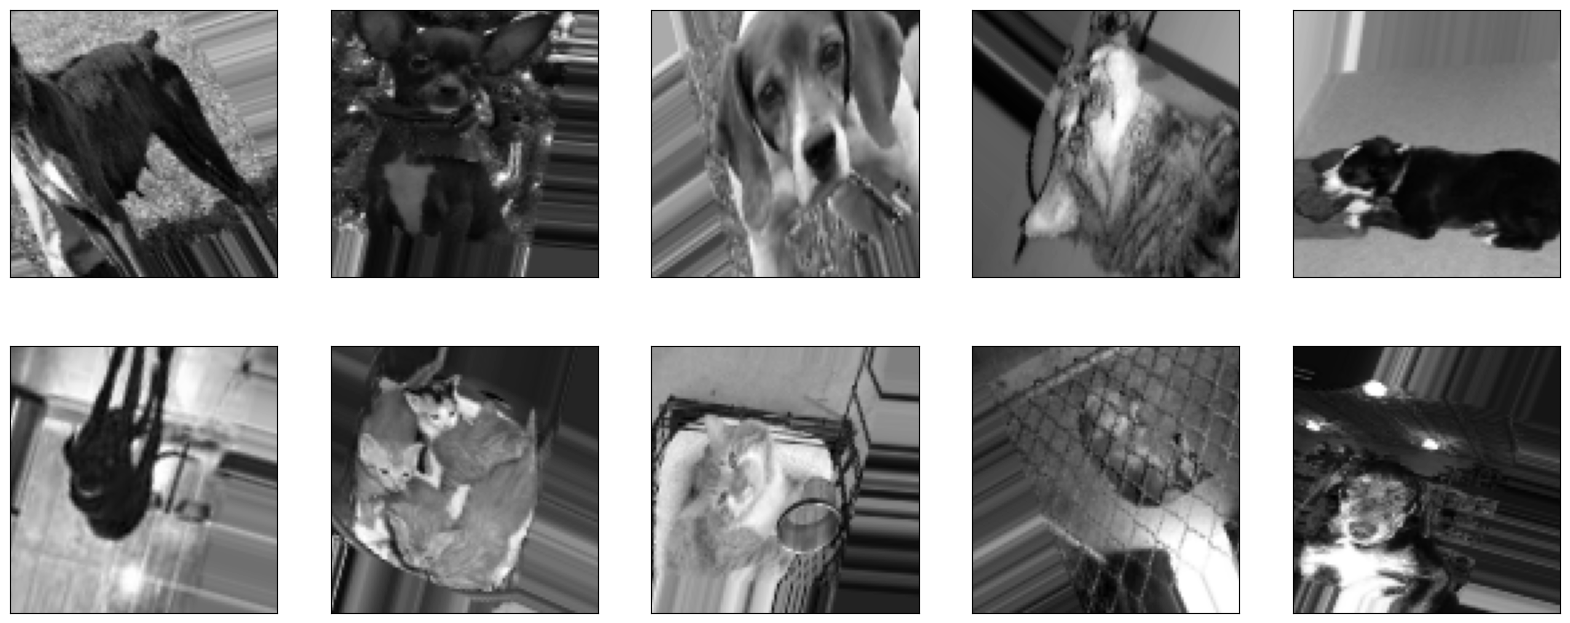

In [ ]:
#Importamos ImageDataGenerator que nos da varias opciones para el aumento de datos de entrenamiento
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    #rotation_range=50, #Angulo de rotacion aleatoria
    #width_shift_range=.5 #movemos la imagen a un lado hasta maximo la mitad (de manera aleatoria)
    #height_shift_range=.5 #movemos la imagen a un verticalmente hasta maximo la mitad (de manera aleatoria)
    #shear_range = 15 #Inclinacion de imagen
    #zoom_range=[.5, 1.5] #Acercamiento que puede estar entre la mitad (50%) del tamaño de la imagen o hasta un 150%
    #vertical_flip=True #Rotaciones aleatorias
    #horizontal_flip=True
    rotation_range=30,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range = 15,
    zoom_range=[.7, 1.4],
    vertical_flip=True,
    horizontal_flip=True
)

datagen.fit(X) #Debemos ajustar nuestros datos al generador

plt.figure(figsize=(20,8))

datagen.flow(X, y, batch_size=10, shuffle=False)
#Hacemos fluir un lote de 10 imagenes (junto con sus etiquetas), indicamos que no queremos cambiar el orden de las imagenes con el valor falso de shuffle

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(tam_img,tam_img), cmap='gray')
    #tomamos la imagen que se este iterando y cambiamos el tamaño al definido en blanco y negro
    #para posteriormente mostrarla

  break #Ponemos esto por que el datagen ya trae un lote de 10, en este caso solo necesitaremos una iteracion


In [ ]:
#Usaremos el generador para el entrenamiento
modelo_A_AD = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(tam_img, tam_img, 1)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

modelo_B_AD = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(tam_img, tam_img, 1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32*2, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32*4, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modelo_C_AD = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(tam_img, tam_img, 1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32*2, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32*4, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
modelo_A_AD.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

modelo_B_AD.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

modelo_C_AD.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
#Cuando usamos generadores DEBEMOS separar los sets en entrenmiento y prueba
n = round(len(X)*.85)
print(n, len(X) - round(len(X)*.85))

19773 3489


In [ ]:
X_entrenamiento = X[:n]
X_validacion = X[n:]

y_entrenamiento = y[:n]
y_validacion = y[n:]

In [ ]:
y_validacion[0]

0

In [ ]:
#Si nos quedamos sin memoria debemos llamar al recolector de basura tal que:
import gc
gc.collect() #Libera RAM, que maravila

39748

In [ ]:
data_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [ ]:
tensorboard_A_AD = TensorBoard(log_dir='logs/A_AD')
tensorboard_B_AD = TensorBoard(log_dir='logs/B_AD')
tensorboard_C_AD = TensorBoard(log_dir='logs/C_AD')

In [ ]:
modelo_A_AD.fit(data_gen_entrenamiento,
                batch_size=32,
                epochs=100,
                validation_data=(X_validacion, y_validacion),
                steps_per_epoch=int(np.ceil( len(X_entrenamiento) / float(32))),
                #Se debe especificar esta variable donde pondremos la cantidad total de datos entre el batch_size (tamaño de lote)
                validation_steps=int(np.ceil( len(X_validacion) / float(32))),
                #Tambien se debe hacer para validacion
                callbacks=[tensorboard_A_AD] #Luego de cada uno de las epocas, se guardaran los resultados de la iteracion en forma de logs
                )

Epoch 1/100
618/618 [==============================] - 33s 49ms/step - loss: 0.7314 - accuracy: 0.5124 - val_loss: 0.6889 - val_accuracy: 0.5506
Epoch 2/100
618/618 [==============================] - 36s 58ms/step - loss: 0.6926 - accuracy: 0.5174 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 3/100
618/618 [==============================] - 26s 42ms/step - loss: 0.6924 - accuracy: 0.5155 - val_loss: 0.7053 - val_accuracy: 0.5153
Epoch 4/100
618/618 [==============================] - 24s 39ms/step - loss: 0.6924 - accuracy: 0.5167 - val_loss: 0.6937 - val_accuracy: 0.5142
Epoch 5/100
618/618 [==============================] - 26s 42ms/step - loss: 0.6925 - accuracy: 0.5117 - val_loss: 0.6931 - val_accuracy: 0.5130
Epoch 6/100
618/618 [==============================] - 37s 59ms/step - loss: 0.6928 - accuracy: 0.5017 - val_loss: 0.6916 - val_accuracy: 0.5337
Epoch 7/100
618/618 [==============================] - 34s 55ms/step - loss: 0.6924 - accuracy: 0.5113 - val_loss: 0.6917 - val_ac

In [ ]:
modelo_B_AD.fit(data_gen_entrenamiento,
                batch_size=32,
                epochs=100,
                validation_data=(X_validacion, y_validacion),
                steps_per_epoch=int(np.ceil( len(X_entrenamiento) / float(32))),
                #Se debe especificar esta variable donde pondremos la cantidad total de datos entre el batch_size (tamaño de lote)
                validation_steps=int(np.ceil( len(X_validacion) / float(32))),
                #Tambien se debe hacer para validacion
                callbacks=[tensorboard_B_AD] #Luego de cada uno de las epocas, se guardaran los resultados de la iteracion en forma de logs
                )

Epoch 1/100
618/618 [==============================] - 33s 47ms/step - loss: 0.6828 - accuracy: 0.5525 - val_loss: 0.6616 - val_accuracy: 0.5907
Epoch 2/100
618/618 [==============================] - 28s 45ms/step - loss: 0.6614 - accuracy: 0.6047 - val_loss: 0.6400 - val_accuracy: 0.6457
Epoch 3/100
618/618 [==============================] - 28s 46ms/step - loss: 0.6487 - accuracy: 0.6184 - val_loss: 0.6244 - val_accuracy: 0.6615
Epoch 4/100
618/618 [==============================] - 27s 44ms/step - loss: 0.6379 - accuracy: 0.6359 - val_loss: 0.6238 - val_accuracy: 0.6552
Epoch 5/100
618/618 [==============================] - 28s 46ms/step - loss: 0.6296 - accuracy: 0.6468 - val_loss: 0.6012 - val_accuracy: 0.6750
Epoch 6/100
618/618 [==============================] - 28s 46ms/step - loss: 0.6167 - accuracy: 0.6606 - val_loss: 0.5707 - val_accuracy: 0.7016
Epoch 7/100
618/618 [==============================] - 28s 45ms/step - loss: 0.5995 - accuracy: 0.6777 - val_loss: 0.5644 - val_ac

In [ ]:
modelo_C_AD.fit(data_gen_entrenamiento,
                batch_size=32,
                epochs=100,
                validation_data=(X_validacion, y_validacion),
                steps_per_epoch=int(np.ceil( len(X_entrenamiento) / float(32))),
                #Se debe especificar esta variable donde pondremos la cantidad total de datos entre el batch_size (tamaño de lote)
                validation_steps=int(np.ceil( len(X_validacion) / float(32))),
                #Tambien se debe hacer para validacion
                callbacks=[tensorboard_C_AD] #Luego de cada uno de las epocas, se guardaran los resultados de la iteracion en forma de logs
                )

Epoch 1/100
  8/618 [..............................] - ETA: 19s - loss: 0.7305 - accuracy: 0.4883

KeyboardInterrupt: 

In [ ]:
modelo_B_AD.save("dogs_cats.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflowjs

In [ ]:
!mkdir carpeta_output

mkdir: cannot create directory ‘carpeta_output’: File exists


In [ ]:
!tensorflowjs_converter --input_format keras dogs_cats.h5 "carpeta_output"

2024-01-19 02:28:27.184139: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 02:28:27.184186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 02:28:27.185440: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 02:28:28.808339: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!tensorflowjs_converter --input_format keras  \
                      d/content/dogs_&_cats.h5 \
                      /content/carpeta_output

/bin/bash: line 1: _cats.h5: command not found
2024-01-19 02:28:02.276840: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 02:28:02.277971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 02:28:02.279806: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 02:28:03.771370: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/conve

In [ ]:
!tar -czvf logs_2.tar.gz logs

logs/
logs/B_AD/
logs/B_AD/train/
logs/B_AD/train/events.out.tfevents.1705627108.03ee23276ec3.3789.2.v2
logs/B_AD/validation/
logs/B_AD/validation/events.out.tfevents.1705627141.03ee23276ec3.3789.3.v2
logs/C_AD/
logs/C_AD/train/
logs/C_AD/train/events.out.tfevents.1705630509.03ee23276ec3.3789.4.v2
logs/A_AD/
logs/A_AD/train/
logs/A_AD/train/events.out.tfevents.1705623848.03ee23276ec3.3789.0.v2
logs/A_AD/train/events.out.tfevents.1705623417.03ee23276ec3.663.0.v2
logs/A_AD/train/events.out.tfevents.1705623714.03ee23276ec3.663.2.v2
logs/A_AD/train/events.out.tfevents.1705623650.03ee23276ec3.663.1.v2
logs/A_AD/validation/
logs/A_AD/validation/events.out.tfevents.1705623881.03ee23276ec3.3789.1.v2
